# Name : Muhammad Asim
# Seat No # B19103032

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** top 5 zipcodes for 911 calls? **

In [29]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** top 5 townships (twp) for 911 calls? **

In [30]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** unique 'title' codes **

In [31]:
df['title'].nunique()

110

## Exploratory Data Analysis

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** most common Reason for a 911 call based off of this new column **

In [7]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** using seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

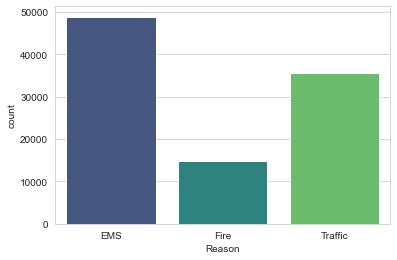

In [8]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
** data type of the objects in the timeStamp column? **

In [9]:
type(df['timeStamp'].iloc[0])

str

** convert the column from strings to DateTime objects. **

In [10]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** grabbing specific attributes from a Datetime object by calling them **


In [11]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **


In [12]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [13]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

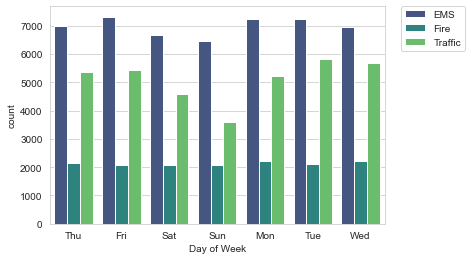

In [14]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now doing same for Month:**

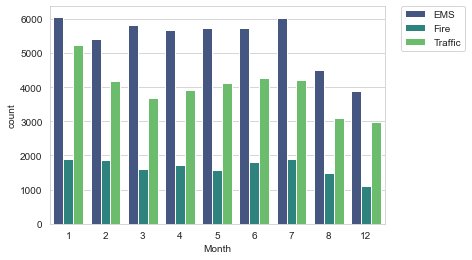

In [15]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Did you notice something strange about the Plot? **

In [16]:
# It is missing some months! 9,10, and 11 are not there.

In [17]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** creating a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

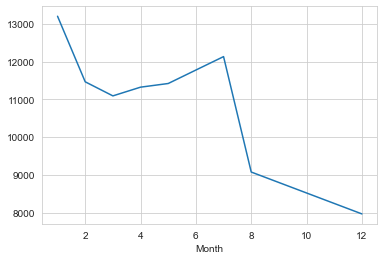

In [18]:
# Could be any column
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

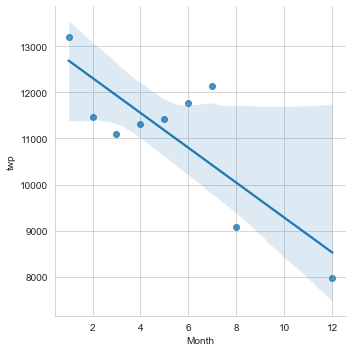

In [19]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column. ** 

In [21]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

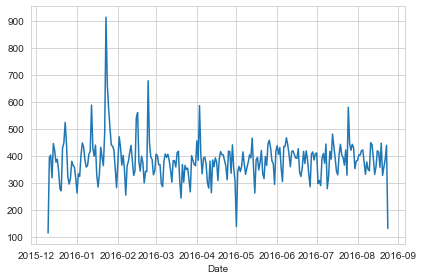

In [22]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

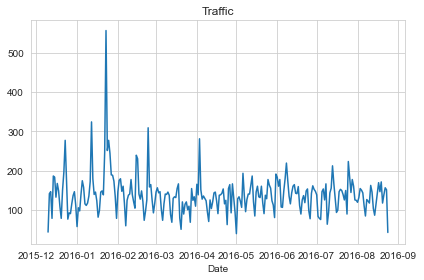

In [23]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

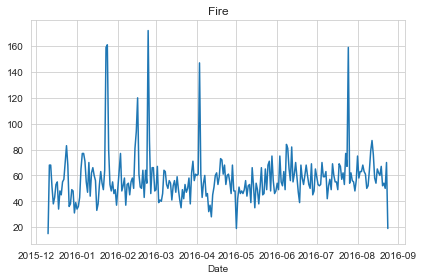

In [24]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

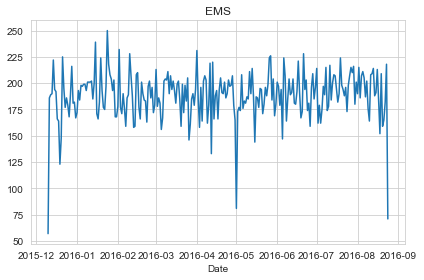

In [25]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [26]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now creating a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

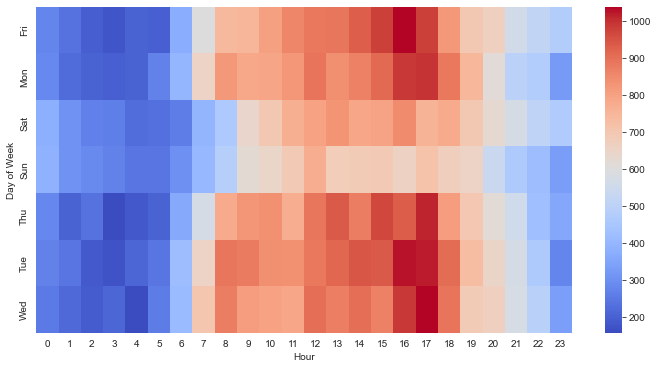

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

** Now creating a clustermap using this DataFrame. **

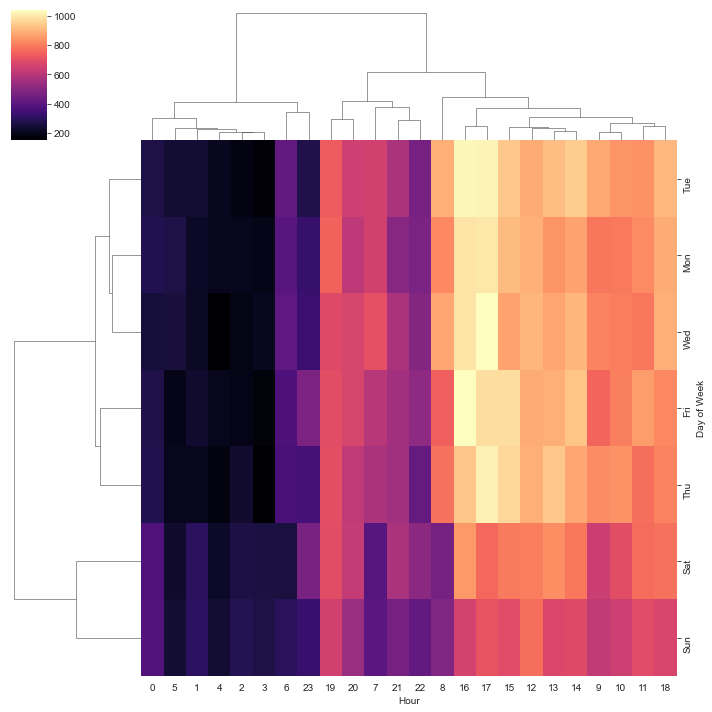

In [29]:
sns.clustermap(dayHour,cmap='magma')

In [30]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

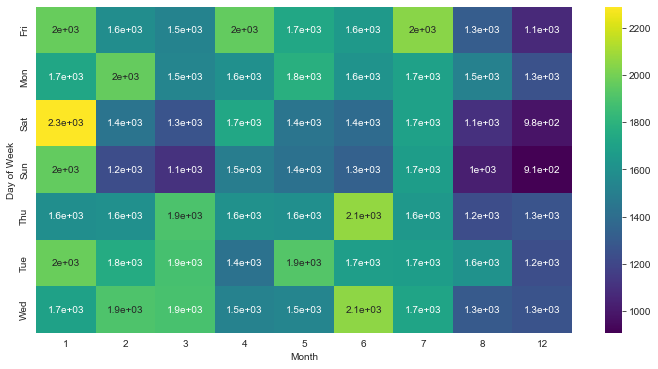

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',annot=True)

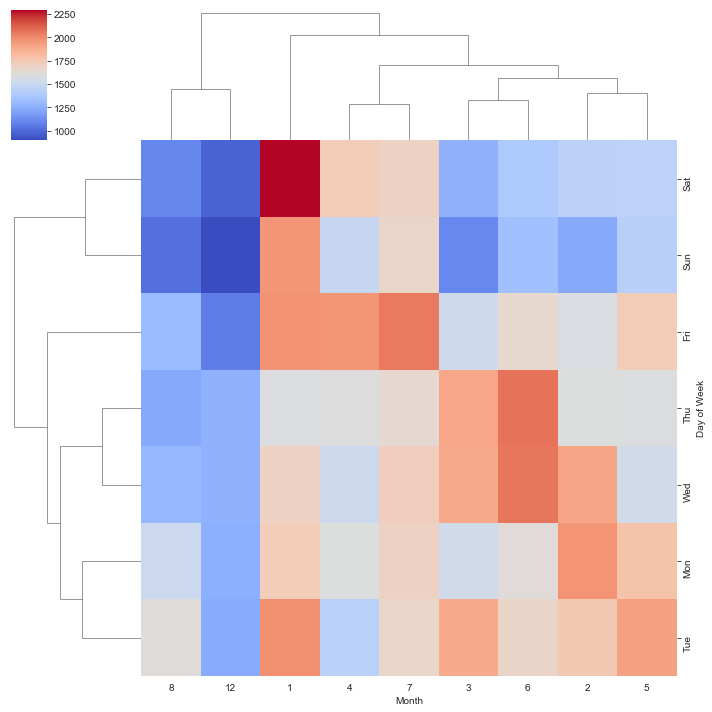

In [33]:
sns.clustermap(dayMonth,cmap='coolwarm')

# Creating Model 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
 13  Date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


In [38]:
df.dropna(axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   title        99492 non-null  object        
 4   timeStamp    99492 non-null  datetime64[ns]
 5   e            99492 non-null  int64         
 6   Reason       99492 non-null  object        
 7   Hour         99492 non-null  int64         
 8   Month        99492 non-null  int64         
 9   Day of Week  99492 non-null  object        
 10  Date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 8.3+ MB


In [40]:
df.head(3)

,lat,lng,desc,title,timeStamp,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,1,Fire,17,12,Thu,2015-12-10


# CLASSIFICATION MODELS

# Logistic Regression

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [54]:
final_data = df.drop(labels=['desc','title','timeStamp','Date','Day of Week'],axis=1)

In [55]:
final_data

,lat,lng,e,Reason,Hour,Month
0,40.297876,-75.581294,1,EMS,17,12
1,40.258061,-75.264680,1,EMS,17,12
2,40.121182,-75.351975,1,Fire,17,12
3,40.116153,-75.343513,1,EMS,17,12
4,40.251492,-75.603350,1,EMS,17,12
...,...,...,...,...,...,...
99487,40.132869,-75.333515,1,Traffic,11,8
99488,40.006974,-75.289080,1,Traffic,11,8
99489,40.115429,-75.334679,1,EMS,11,8
99490,40.186431,-75.192555,1,EMS,11,8


In [65]:
X = final_data.drop('Reason',axis=1)
y = final_data['Reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

In [66]:
logmodel = LogisticRegression()

In [67]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         EMS       0.49      1.00      0.66     10825
        Fire       0.00      0.00      0.00      3277
     Traffic       0.75      0.00      0.00      7787

    accuracy                           0.49     21889
   macro avg       0.41      0.33      0.22     21889
weighted avg       0.51      0.49      0.33     21889



In [71]:
print(confusion_matrix(y_test,predictions))

[[10825     0     0]
 [ 3276     0     1]
 [ 7784     0     3]]


    # Logistic Regression is not able to give good Accuracy. Let's Try another Classification Algorithm!

# Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
predictions = dtree.predict(X_test)

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         EMS       0.62      0.63      0.63     10825
        Fire       0.22      0.21      0.22      3277
     Traffic       0.56      0.54      0.55      7787

    accuracy                           0.54     21889
   macro avg       0.47      0.46      0.46     21889
weighted avg       0.54      0.54      0.54     21889



In [86]:
print(confusion_matrix(y_test,predictions))

[[6863 1602 2360]
 [1613  703  961]
 [2632  926 4229]]


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
forest = RandomForestClassifier(n_estimators=600)

In [89]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [90]:
predictions = forest.predict(X_test)

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         EMS       0.62      0.72      0.67     10825
        Fire       0.25      0.12      0.17      3277
     Traffic       0.57      0.57      0.57      7787

    accuracy                           0.58     21889
   macro avg       0.48      0.47      0.47     21889
weighted avg       0.55      0.58      0.56     21889



In [92]:
print(confusion_matrix(y_test,predictions))

[[7809  727 2289]
 [1844  407 1026]
 [2884  467 4436]]


# Naive Bayes Classifier

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
nb = GaussianNB()

In [95]:
nb.fit(X_train,y_train)

GaussianNB()

In [96]:
predictions = nb.predict(X_test)

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         EMS       0.53      0.76      0.62     10825
        Fire       0.00      0.00      0.00      3277
     Traffic       0.42      0.34      0.37      7787

    accuracy                           0.50     21889
   macro avg       0.32      0.37      0.33     21889
weighted avg       0.41      0.50      0.44     21889



In [99]:
print(confusion_matrix(y_test,predictions))

[[8280    0 2545]
 [2269    0 1008]
 [5177    0 2610]]


    This Shows That Random Forest Gives The Best Accuracy For This DataSet